# Fundamentals of Machine Learning - Exercise 3
* Goal of the excercise is to learn about more advanced vizualization techniques.


![meme1](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_03_meme_02.jpg?raw=true)


## We will use House prices dataset once more

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import packages

In [7]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv")

## 🔎 What does the *...* in the middle of table columns mean?

### 💡 Hint: If the dataset has too many columns, it is good to set pandas parameter **display.max_columns** to None so there is no such limit

In [ ]:
with pd.option_context('display.max_columns', None):
    display(df)

# Let's start with the plots already!

# 📊 Pairplot
* Plot pairwise relationships in a dataset
    * i.e. **Scatterplots for multiple pairs of numerical attributes**
    * See [this](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for more details

## Select only interesting features for pairplot visualization
* 💡 The pairplot might be too big to see anything in the visualization otherwise
* Select just subset of features and use *vars* parameter for it

> ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

## 💡 Notice that both OverallQual and OverallCond columns are rather categorical features
* Even though they are represented by numerical values
    * So one would expect that the features are numerical, but they aren't

* Scatter plot may not be the best way to visualize this type of data
    * 🔎 What type of plot is more reseonable?

* Let's select only appropropriate features this time
* Also distinguish among different **BldgType** in the plot
    * *hue* parameter

> ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

## In the following steps we want to threat OverallQual and OverallCond as categories instead of numbers
* for modifying of column's types you can use function *astype*

# 🔎 Are you able to say which categorical attributes affect the price right now?
- Yeah... me neither so let's find out by plotting the data first 🙂

## Start with a selection of only the categorical features
* Use *select_dtypes* function with *exclude* parameter to get rid of numerical (*np.number*) attributes
    * Save these column names into a variable
* Loop over the selected columns and fill *NaN* values with **'MISSING'** string

## Check the result

In [ ]:
df.head()

![meme2](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_03_meme_01.jpg?raw=true)

# 📊 Very useful feature is the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function
* It is useful for defining our own grids for plots based on our needs

## We will plot boxplots of *SalePrice* along with the value counts using barplot for each categorical feature
* **🔎 Why is this pair of plots useful?**

* The *subplots* function has 3 important parameters
    1. Number of rows - *nrows*
    2. Number of columns - *ncols*
    3. Figure size - *figsize*
* It returns a *figure* and *axes* objects
    * The *axes* contains reference to individual subplots
    * 💡 Use *flat* property to access 1D array of subplots

In [ ]:
fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(10, 150))

for i, col in enumerate(qualitative_columns):
    ax_left = axes.flat[2*i]
    ax_right = axes.flat[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)

fig.tight_layout()

# 📊 Correlation
* 🔎 What does the *correlation coefficient* tell you?
* What is the range of it?
* Is it useful for each type of relationship?
* 💡 **Correlation is not causation**
    * e.g. Ice cream sales X Number of thefts

- Take a look at [this link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
- See also [this](https://www.simplypsychology.org/correlation.html) or [this](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp) for some more info about the topic

## We can compute the correlation matrix using *corr()* function
* Select columns first

> ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

## 📊 Vizualize the matrix using *heatmap* plot

In [ ]:
plt.figure(figsize=(12, 9))


## Which color scheme will be more appropropriate for corellation representation?
- Change color map *cmap* (e.g. RdYlGn)
- Set limits to adjust color map values from -1 to 1
    - Attributes *vmin*, *vmax*

In [ ]:
plt.figure(figsize=(12, 9))


## Add values to the heatmap and amplify heatmap's readability
* Use *cmap=sns.light_palette("seagreen", as_cmap=True)* color map
* Set minimum value to **0.3**
* Enable annotations using *annot* parameter
* Plot each column as a *square* (same name of the parameter)

In [ ]:
plt.figure(figsize=(12, 9))


# 💡 I highly recommend taking a look at the plot gallery for some more plots!
* https://seaborn.pydata.org/api.html

## 📊 Let's try for example scatter plot with regression line fron the example gallery
* 🔎 What insight does it give us about the trend?

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='GrLivArea', y='SalePrice')
plt.show()

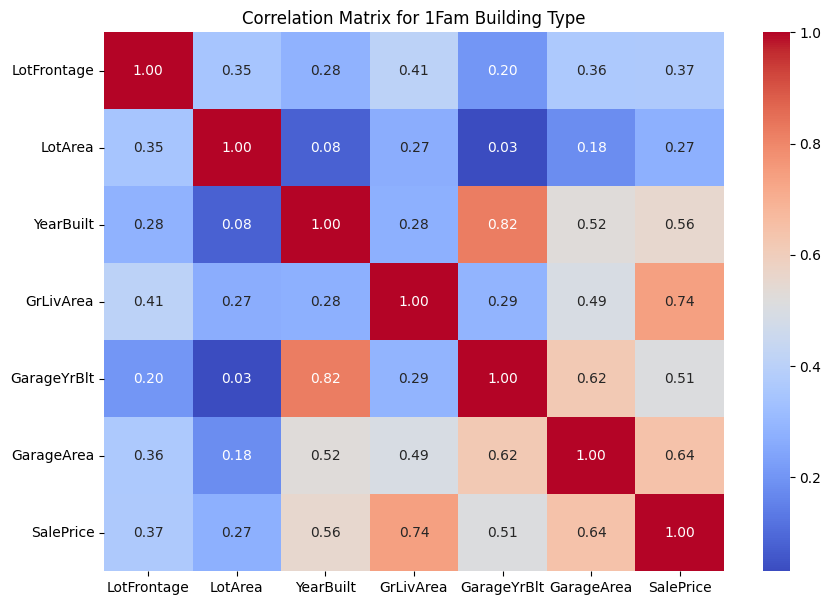

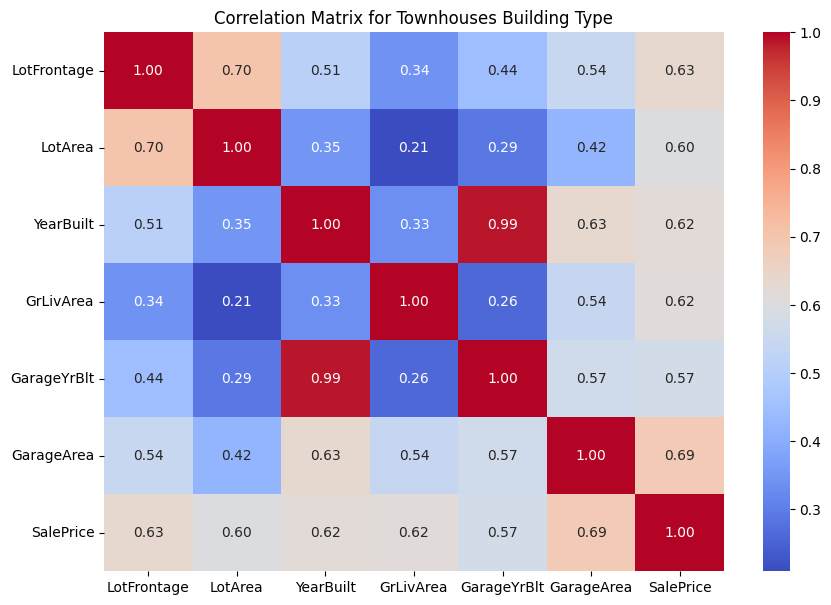

In [ ]:
df_fam = df[df['BldgType'] == '1Fam']
df_twn = df[df['BldgType'].isin(['Twnhs', 'TwnhsE'])]

features = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

corr_fam = df_fam[features].corr()
corr_twn = df_twn[features].corr()

#df_fam
plt.figure(figsize=(10, 7))
sns.heatmap(corr_fam, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for 1Fam Building Type')
plt.show()

#df_twn
plt.figure(figsize=(10, 7))
sns.heatmap(corr_twn, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Townhouses Building Type')
plt.show()

#grafy porovnavaji rozdily v hodnotach u jednotlivych features, čím větší je  hodnota, tím větší je podobnost, nejmešní podobnost má LotArea a GarageYrBuilt

# ✅ Task (2p)
1. Create two filtered dataframes:
    * The first one *df_fam* will contain only the data for **BldgType** = '1Fam'
    * The second one *df_twn* will contain only the data for **BldgType** = 'Twnhs' or 'TwnhsE'

2. Plot two correlation matrices
    * 💡 One for each of the datasets and use these features:
    > ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

3. Do you see any differences or similarities in the correlation matrices?
    * Which features you take as correlated and which are not according to you?
    * **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
        * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌